In [1]:
# IMPORTS

import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import layers, models
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical

In [2]:
# Here you need to load the cifar10 data, scale it to match the CNN input requirements, and one-hot encode the labels to improve classification.
# Training the teacher model

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

X_train = x_train.astype('float32')/255.0

X_test = x_test.astype('float32')/255.0

test_labels = to_categorical(y_test)
train_labels = to_categorical(y_train)



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


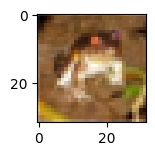

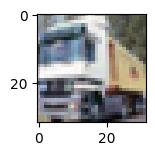

In [3]:
# Plot the data you are using
for i in range(2):  
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [4]:
# Target model architecture, basic CNN architecture

target_model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
target_model.summary()

C:\Users\tnpe-home\.conda\envs\kd\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 362,794 (1.38 MB)

 Trainable params: 362,346 (1.38 MB)

 Non-trainable params: 448 (1.75 KB)

In [5]:
# Compile the target model
target_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [6]:
# Fit the target model on the dataset loaded

target_model.fit(X_train, train_labels, epochs=30, batch_size=70)

Epoch 1/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.3704 - loss: 1.8771
Epoch 2/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.5961 - loss: 1.1408
Epoch 3/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.6629 - loss: 0.9618
Epoch 4/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.7012 - loss: 0.8590
Epoch 5/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.7181 - loss: 0.8060
Epoch 6/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.7473 - loss: 0.7399
Epoch 7/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.7572 - loss: 0.7000
Epoch 8/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.7683 - loss: 0.6715
Epoch 9/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.7831 - loss: 0.6330
Epoch 10/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.7812 - loss: 0.6245
Epoch 11/30
715/715 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.7976 - loss: 0.5975
Epoch 12/30
715/715 ━━━━━━━━━━

In [7]:
# Compute target model's loss and accuracy on the test dataset
target_model.evaluate(X_test, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8129 - loss: 0.5849


[0.5897411704063416, 0.8090000152587891]

In [8]:
# Save target model to a file locally so that it can be later loaded
target_model.save('teacher_model.h5')